# 스케줄링

러닝 레이트가 너무 크면 왔다갔다하다가 학습이 안될 수 있음. 

맨 끝부분으로 갈수록 미세하게 조절해야 함

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [25]:
import tensorflow as tf

In [26]:
from tensorflow import keras

In [27]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
fashion_mnist = keras.datasets.fashion_mnist

In [29]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [30]:
X_train_full.shape

(60000, 28, 28)

In [31]:
X_train_full.dtype

dtype('uint8')

In [32]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [33]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [34]:
X_test = X_test / 255.0

In [35]:
pixel_means = X_train.mean(axis=0, keepdims=True)

In [36]:
pixel_stds = X_train.std(axis=0, keepdims=True)

In [37]:
X_train_scaled = (X_train - pixel_means) / pixel_stds

In [38]:
X_valid_scaled = (X_valid - pixel_means) / pixel_stds

In [39]:
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [40]:
# 학습률 스케쥴링

In [41]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4) # 1e-4 = 0.0001

In [43]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.Dense(10,activation='softmax')
])

In [48]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [49]:
%%time
n_epochs = 25
hist = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 3s 55us/sample - loss: 0.4868 - accuracy: 0.8294 - val_loss: 0.4128 - val_accuracy: 0.8556
Epoch 2/25
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3812 - accuracy: 0.8644 - val_loss: 0.3787 - val_accuracy: 0.8714
Epoch 3/25
55000/55000 [==============================] - 3s 55us/sample - loss: 0.3493 - accuracy: 0.8754 - val_loss: 0.3729 - val_accuracy: 0.8720
Epoch 4/25
55000/55000 [==============================] - 3s 55us/sample - loss: 0.3287 - accuracy: 0.8831 - val_loss: 0.3576 - val_accuracy: 0.8724
Epoch 5/25
55000/55000 [==============================] - 3s 55us/sample - loss: 0.3126 - accuracy: 0.8894 - val_loss: 0.3482 - val_accuracy: 0.8750
Epoch 6/25
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3003 - accuracy: 0.8936 - val_loss: 0.3476 - val_accuracy: 0.8776
Epoch 7/25
55000/55000 [==============================] -

## 시각화

In [57]:
learning_rate=0.01
decay=1e-4
batch_size=32
n_steps_per_epoch = len(X_train)//batch_size
epochs=np.arange(n_epochs) #n_epochs=25
lrs=learning_rate/(1+decay*epochs*n_steps_per_epoch)
print(lrs) #줄어드는 속도가 점점 느려짐

[0.01       0.00853388 0.00744269 0.00659892 0.00592698 0.00537924
 0.00492417 0.00454009 0.00421159 0.00392742 0.00367918 0.00346045
 0.00326627 0.00309272 0.00293669 0.00279564 0.00266752 0.00255063
 0.00244355 0.00234511 0.00225428 0.00217023 0.00209223 0.00201963
 0.00195191]


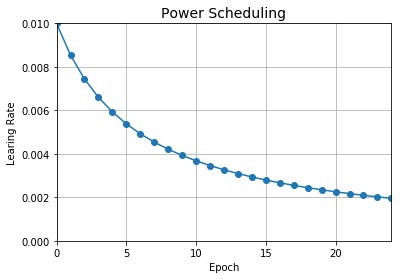

In [64]:
plt.plot(epochs, lrs, "o-") #점선으로 연결
plt.axis([0,n_epochs-1, 0, 0.01])
#대충 추세를 보면 40쯔음에는 0에 근접할 듯
plt.xlabel('Epoch')
plt.ylabel('Learing Rate')
plt.title('Power Scheduling', fontsize=14)
plt.grid(True)
plt.show()

In [65]:
#지수 기반 스케줄링
def exponential_decay_fn(epoch):
    return 0.01*0.1**(epoch/20)

In [66]:
#lr=lr0*0.1**(epoch/s)
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.01**(epoch/s)
    return exponential_decay_fn

In [67]:
exponential_decay_fn = exponential_decay(lr0 = 0.01, s = 20)
model=keras.models.

In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=['accuracy'])
n_epochs = 25

In [73]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [74]:
%%time
hist = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                 validation_data=(X_valid_scaled, y_valid),
                callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 7s 134us/sample - loss: 0.8394 - accuracy: 0.7597 - val_loss: 1.1178 - val_accuracy: 0.7452
Epoch 2/25
55000/55000 [==============================] - 6s 113us/sample - loss: 0.6101 - accuracy: 0.8122 - val_loss: 0.8437 - val_accuracy: 0.8100
Epoch 3/25
55000/55000 [==============================] - 6s 112us/sample - loss: 0.5282 - accuracy: 0.8330 - val_loss: 0.5207 - val_accuracy: 0.8288
Epoch 4/25
55000/55000 [==============================] - 6s 114us/sample - loss: 0.4310 - accuracy: 0.8583 - val_loss: 0.5398 - val_accuracy: 0.8462
Epoch 5/25
55000/55000 [==============================] - 6s 112us/sample - loss: 0.3786 - accuracy: 0.8738 - val_loss: 0.4385 - val_accuracy: 0.8702
Epoch 6/25
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3413 - accuracy: 0.8839 - val_loss: 0.4583 - val_accuracy: 0.8698
Epoch 7/25
55000/55000 [===========================

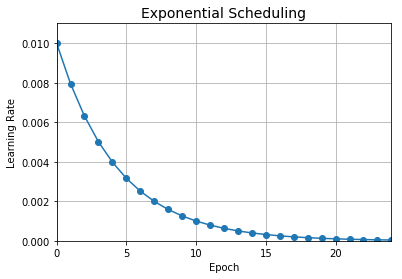

In [75]:
plt.plot(hist.epoch, hist.history["lr"], "o-")
plt.axis([0, n_epochs-1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()